# Pneumonia Detection CNN with Keras by Mahmood-Ali Parker

### Aim
The primary aim of this project is to experiment with multiple Convoluted Neural Network structures with different hyper-parameters
to see how they affect classification performance on the dataset to find a model with optimal predictive performance. 
The focus is on thoroughness rather than computational efficiency. This is also why I haven't decided to implement 
transfer learning even though it may have improved performance and training time.

### The Chest X-ray Dataset
The dataset was acquired from Paul Mooney via Kaggle (https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia) and consists of 5863 JPEG images. It is split into 3 subfolders for training (5216 images), 
testing (624 images) and validation (16 images). Within each subfolder The images are either classed as 'NORMAL' or 
'PNEUMONIA' in their own respective folders. While all the images were correctly classed, the dataset isn't perfectly clean 
so more extreme classification rates mights be harder to achieve. Another aspect to account for is that 73% of the images 
belong to the 'PNEUMONIA' class.
  
The pictures below are two sample images from the dataset. I used the OpenCV library in conjunction with pyplot because 
they allowed BGR to RGB conversion which is necessary when displaying jpeg files with pyplot.

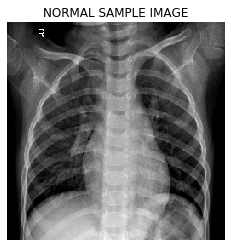

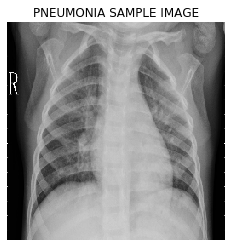

In [19]:
import matplotlib.pyplot as plt
import cv2
normal_sample = cv2.imread("Data and Resources/chest_xray/val/NORMAL/NORMAL2-IM-1440-0001.jpeg")
im_resized = cv2.resize(normal_sample, (256, 256), interpolation=cv2.INTER_LINEAR)
plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title('NORMAL SAMPLE IMAGE')
plt.show()

pneumonia_sample = cv2.imread("Data and Resources/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg")
im_resized = cv2.resize(pneumonia_sample, (256, 256), interpolation=cv2.INTER_LINEAR)
plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title('PNEUMONIA SAMPLE IMAGE')
plt.show()

### Data Set Split
Using the initial dataset split, I was able to get test accuracy of over 89% with some of the models I deployed but the 
way the dataset was split was extremely bad statistical practice as 89% was training data with most of the remainder 
being test data. Model Evaluations really couldn’t be seen as very reliable because we’d have to base accuracy performance on 
only the (relatively small) test set. 
 
To combat this issue, I started by pooling all the Normal and Pneumonia images into single 
folders and then renaming them with random numbers. After this I did 70:15:15 train:validate:test split to give my 
results more credibility. I called this new folder chest_xray(GoodSplit) and will refer to this data set as 'good split' 
from this point onwards. This made adjusting hyper-parameters easier as I now had access to a larger validation 
set during the training process.
 
While the focus was the good split, I ended up using the initial split to train all the models I used as well to see 
how models performed in that situation. The performance tables for both splits can be found in the 'Evaluating Model Performance' section. 
section.
### Libraries Used
**Keras**: Used to create and modify the structure of the CNN as well as train the models.

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import model_from_json

Using TensorFlow backend.


**scikit-learn**: Used to compute model performance metrics

In [2]:
from sklearn.metrics import classification_report, confusion_matrix

**Matplotlib and cv2**: Used together for image display purposes (imports statements already initiated).

**NumPy**: Used for matrix creation and manipulations.

In [3]:
import numpy as np

**pandas**: Used to read in '.csv' files for table display

In [4]:
import pandas as pd

**pathlib**: Used for file system paths

In [5]:
from pathlib import Path

### Summary of the Models Used to Experiment
I used a total of 5 different models with each subsequent model more complex than the previous one.
1. 2 Convolution blocks (64 filters), 2 Dropout layers, 2 Dense layers 
2. 4 Convolution blocks (64 filters), 2 Dropout layers, 2 Dense layers
3. 4 Convolution blocks (ascending filter size), 2 Dropout layers, 2 Dense layers
4. 6 Convolution blocks (ascending filter size) with BatchNormalization, 3 Dropout layers, 2 Dense layers
5. 6 Convolution blocks (ascending filter size) with BatchNormalization, 3 Dropout layers, 3 Dense layers
 
The completed models can be found in the 'ColabNotebook' in the Data snd Resources folder for the interested reader.
 
### The Experiment Process
All the GPU-intensive computations were done in Google's Colaboratory development environment. The notebook I used to 
test all the models I implemented is in the project folder. 
 
Each model-epoch combination was run at least 10 times and the iteration with the best validation performance had 
its weights stored in a file for test evaluation. For the initial split testing, I used the test set for validation, 
which detracts from the reliability of the results but the good split results can be viewed as reliable given the 
quantity of data because a full validation set was used for model selection before evaluation.

### Setting Up the Convoluted Neural Network in Keras
This model is Model 3 from the summary above. I chose this model structure because it had the best results with the good 
dataset split but some other models did have similar performance. Notice that while there is BatchNormalization in the 
subsequent models, Model 3 had no need as the activation values don't get large enough to require normalization.
 
Keras' sequential api lets us create a new NN by adding layers to it one at a time.

In [25]:
model = Sequential()

1st convolutional block:
- input shape is (256, 256, 3) to allow for 256x256 rgb colour images
- 16 filters for this block to allow the model to pick up more abstract patterns

In [26]:
model.add(Conv2D(16, (3, 3),padding = 'same',activation = 'relu', input_shape=(256, 256,3)))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

2nd convolutional block:
- 32 filters for this block to pick up more complex details than the previous block

In [27]:
model.add(Conv2D(32, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(32, (3, 3), padding='same', activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

3rd convolutional block:
- 64 filters for this block to pick up more complex details than the previous block

In [28]:
model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

We add a Dropout layer to help reduce training bias and make neurons work harder to find patterns without memorising the 
data. The dropout layer randomly throws away some of the data by cutting some of the connections between layers (in
this case 25%) to prevent overfitting.

In [29]:
model.add(Dropout(0.25))

4th convolutional block:
- 128 filters for this block to pick up more details than the previous block

In [30]:
model.add(Conv2D(128, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(128, (3, 3), padding='same', activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

We add a flatten layer to transition between convolutional and dense layers because we need to signal to Keras that 
we're no longer working with 2D data.

In [31]:
model.add(Flatten())

We add a dense (fully connected) layers to form the last set of nodes before classification.

In [32]:
model.add(Dense(512, activation="relu"))

We add another Dropout layer, this time severing 50% of node connections, to prevent overfitting and make the network 
work harder to classify items correctly.

In [33]:
model.add(Dropout(0.50))

The last layer does the classification. It is a single node and uses sigmoid activation for image classification for 
this binary case.

In [34]:
model.add(Dense(1, activation="sigmoid"))

Next, we compile our NN. This is where we tell Keras that we wanna create the NN in memory, how we'll be training it and 
how we will be measuring its accuracy.
- We use binary binary crossentropy as the loss function because we are doing a binary classification.
- We use rmsprop as an optimization function because it is a suitable adaptive learning rate algorithm.
- We only use the accuracy metric because, for the purpose of gauging my network(s) training performance, it is adequate.

In [35]:
model.compile(
  loss='binary_crossentropy',
  optimizer='rmsprop', 
  metrics=['accuracy'] 
)

The summary function provides a summary of all the layers of the model we just compiled.

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 16)      448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 16)      2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 64)       

### Loading Training Data
The batch_size=64 is number of images used in each batch for training, validation and testing. The epochs=20 is the 
number of times the training data is passed through the model.

In [37]:
batch_size = 64
epochs = 20

Next, we set up iterators for each dataset using keras.preprocessing's ImageDataGenerator.
 
First we create an ImageDataGenerator object, then we create iterators using ImageDataGenerator's flow_from_directory 
function:
- Target size specifies the 256x256 image resolution we're using so the generator crops the image
- Batch size is set to to our pre-decided batch size
- Class mode is set to binary so that the generator knows we're only using two classes
 
This will also return the size of each set in the iterators.

In [38]:
datagen = ImageDataGenerator()
train_gen = datagen.flow_from_directory('Data and Resources/chest_xray(GoodSplit)/train/',
                                       target_size=(256, 256),
                                       batch_size= batch_size,
                                       class_mode='binary')
val_gen = datagen.flow_from_directory('Data and Resources/chest_xray(GoodSplit)/test/',
                                     target_size=(256, 256),
                                     batch_size= batch_size,
                                     class_mode='binary')
test_gen = datagen.flow_from_directory('Data and Resources/chest_xray(GoodSplit)/test/',
                                       target_size=(256, 256),
                                       batch_size= batch_size,
                                       class_mode='binary', 
                                       shuffle=False)

Found 4099 images belonging to 2 classes.
Found 880 images belonging to 2 classes.
Found 880 images belonging to 2 classes.


### Training the Model
We use the fit_generator function to train the model using an iterator (our training iterator). The extended training time length is because this particular model fitting was done using CPU alone. We can expect about 1 minute per epoch on a data centre quality GPU.
- steps_per_epoch=no_images//batch_size denotes how many steps the model takes to complete each epoch 
- epochs is rather trivially, the number of epochs
- We set our validation data to the validation iterator
- The validation steps is calculated similarly to the steps_per_epoch.

In [39]:
model.fit_generator(
        train_gen,
        steps_per_epoch=train_gen.samples // batch_size, 
        epochs=epochs,
        validation_data=val_gen,
        validation_steps=val_gen.samples // batch_size)

Epoch 1/20
64/64 [==============================] - 311s 5s/step - loss: 11.6998 - accuracy: 0.7861 - val_loss: 0.1727 - val_accuracy: 0.8654
Epoch 2/20
64/64 [==============================] - 320s 5s/step - loss: 0.3442 - accuracy: 0.8711 - val_loss: 0.6142 - val_accuracy: 0.7929
Epoch 3/20
64/64 [==============================] - 325s 5s/step - loss: 0.2712 - accuracy: 0.8996 - val_loss: 0.2245 - val_accuracy: 0.8848
Epoch 4/20
64/64 [==============================] - 322s 5s/step - loss: 0.2110 - accuracy: 0.9323 - val_loss: 0.1469 - val_accuracy: 0.9289
Epoch 5/20
64/64 [==============================] - 321s 5s/step - loss: 0.1488 - accuracy: 0.9470 - val_loss: 0.1897 - val_accuracy: 0.9277
Epoch 6/20
64/64 [==============================] - 325s 5s/step - loss: 0.1265 - accuracy: 0.9517 - val_loss: 0.2193 - val_accuracy: 0.9461
Epoch 7/20
64/64 [==============================] - 322s 5s/step - loss: 0.1136 - accuracy: 0.9566 - val_loss: 0.1569 - val_accuracy: 0.9314
Epoch 8/20
6

### Saving Model's Structure and Weights
We save the model's structure in a json file and the weights in the binary h5 format.

In [41]:
model_structure=model.to_json()
f = Path("Data and Resources/model_structure.json")
f.write_text(model_structure)
model.save_weights('Data and Resources/model_weights.h5') 

### Loading Model Structure and Weights
To comment on the best performance I achieved, I will load the model weights from the best results I got during my
testing and recompile this model. The model structure has been constructed (as shown) and is already compiled so there's 
no need to recompile it.

In [ ]:
model.load_weights('Data and Resources/model_weights(M3E20).h5')

### Evaluating Model Performance

I set up the confusion matrix as follows:
- We use the test iterator we created earlier to feed data to the model to be predicted.
- We use the predict_generator function to produce an array of the model's predicted probabilities for each item in the 
test sample. Probability > 0.5 implies the item is predicted as being 'PNEUMONIA'. 
- We create a new array of the same size as y_probs but containing only zeroes.
- We then iterate over the predicted probabilities matrix and switch each index with probability >0.5 in y_probs to 1 
in the y_pred array.

In [43]:
y_probs = model.predict_generator(test_gen, np.math.ceil(test_gen.samples//batch_size)+1)
y_pred=np.zeros(y_probs.size)
for i in range(y_probs.size):
     if y_probs[i]>=0.5:
         y_pred[i]=1

We use sklearn.metric's confusion_matrix and classification_report functions to produce our performance metrics.
 
We compare the observed outcomes (test_gen.classes) to our predicted outcomes and produce a confusion matrix and 
a classification report.

In [44]:
print('Confusion Matrix')
print(confusion_matrix(test_gen.classes, y_pred))
print('Classification Report')
target_names = ['NORMAL', 'PNEUMONIA']
print(classification_report(test_gen.classes, y_pred, 
target_names=target_names))

Confusion Matrix
[[207  31]
 [ 23 619]]
Classification Report
              precision    recall  f1-score   support

      NORMAL       0.90      0.87      0.88       238
   PNEUMONIA       0.95      0.96      0.96       642

    accuracy                           0.94       880
   macro avg       0.93      0.92      0.92       880
weighted avg       0.94      0.94      0.94       880



**What do these metrics mean?**  
The **precision** is the number of true positive predictions as a percentage of the total number of positive predictions. We can see 
both classes have reasonably high precisions with 90% and 95% for the 'NORMAL' and 'PNEUMONIA' classes respectively.
Since the 'PNEUMONIA' class has greater support, we see the weighted average precision of 94% is closer to its class 
precision of 95% than the 'NORMAL' class' 90%. Overall, this 94% precision is a reasonably good outcome for the models 
precision performance.
 
The **recall** is the number of true positive predictions as a percentage of the number of observations (support). The 
'NORMAL' class has a recall of 87% while the 'PNEUMONIA' class has a recall of 96%. While the 'NORMAL' class' recall is 
significantly lower, in this particular use case, it is much more imperative that the 'PNEUMONIA' class has a high 
recall because of the dangers of classifying a patient with pneumonia as being normal. It is less of a concern when a 
normal patient is misclassified as having pneumonia. Taking this into account, the recall values for both 'PNEUMONIA' 
and 'NORMAL' are both reasonably good. The weighted average recall of 94% is a good outcome for the model's overall 
recall performance.
 
The **f1-score** is the harmonic mean between the recall and precision. It conveys the balance between the precision and 
recall. A good f1-score (close or equal-to 1) is representative of performance that indicates low false positives and 
low false negatives. Looking at the f1-score numbers, we can see that they represent a combination of the respective precision and 
recall values we described above. The overall f1-score of 94% is a good outcome for the model's overall recall performance. 
 
The accuracy of 94% simply represents the percentage of predictions that were correct. This isn't as useful of a metric 
as the ones described above but the 94% value is good nonetheless.
 
**How did the other models performs?**  
The tables below are from '.csv' files I created to store performance data and show the performance for both splits for the 5 models over 2, 5, 10,15 and 20 epochs. I read them in using pandas for the 1-line solution. The format is 'precision|recall'.

In [11]:
print(pd.read_csv('Data and Resources/good.csv'))

   Good Split                          Epochs                       
0       Model          2          5         10         15         20
1           1  0.79|0.77  0.89|0.89  0.88|0.88  0.92|0.92  0.93|0.93
2           2  0.86|0.83  0.88|0.83  0.93|0.93  0.92|0.92  0.93|0.93
3           3  0.87|0.79  0.92|0.92  0.93|0.93  0.92|0.92  0.94|0.94
4           4  0.86|0.77  0.87|0.79  0.86|0.76  0.87|0.84  0.90|0.91
5           5  0.89|0.88  0.86|0.73  0.82|0.77  0.91|0.90  0.92|0.90


In [12]:
print(pd.read_csv('Data and Resources/initial.csv'))

  Initial Split                          Epochs                       
0         Model          2          5         10         15         20
1             1  0.80|0.78  0.77|0.75  0.77|0.72  0.79|0.73  0.80|0.73
2             2  0.80|0.80  0.81|0.81  0.82|0.79  0.80|0.78  0.82|0.76
3             3  0.83|0.83  0.83|0.81  0.83|0.79  0.83|0.81  0.83|0.81
4             4  0.87|0.87  0.87|0.87  0.82|0.80  0.89|0.88  0.84|0.78
5             5  0.87|0.86  0.87|0.87  0.83|0.80  0.88|0.88  0.86|0.83


We can see that, rather conveniently, the models performed substantially better when trained with the good split data's training set (over it's test set) despite the smaller quantity of traning data used.

## Conclusion
**Did the Project Achieve What the Aim Set Out?**  
After completing my experimentation with the different models and epoch sizes, I've got what I believe to be a reasonably exhaustive set of performance outcomes (given the time and access to computing power) that I had for dataset on the models I decided to experiment with. The models, while not radically different from each other, do deviate enough to the point where it's fair to say the differing hyper-parameters were responsible for the observable differences in performance we can see in the tables above. I'm also confident that the 94% accuracy achieved is towards the upper percentiles of what's attainable with this dataset using the computing power I had access to in conjunction with Keras.

**What Is the Impact of the Final Model Performance?**  
The precision and recall (both 94%) are very good given the average quality and low quantity of the data. The nature of 
pneumonia classification requires near-perfect pneumonia classification performance so the model can't really be used in a serious practical setting. However, as a learning exercise, the results were an excellent outcome to illustrate the capabilities of convoluted neural networks when applied to a practical use case.  